In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def concentration_at_t(n, G, cadr, c_0, ach, t):
    return n * G / cadr + (c_0 - n * G / cadr) * np.exp(-ach * t / 3600)

Quanta Generation Rate:
$$
\begin{equation}
\begin{aligned}
100 \frac{quanta}{hr} \cdot \frac{hr}{3600 sec} = 0.02777 \frac{quanta}{sec}
\end{aligned}
\end{equation}
$$

CADR:
$$
\begin{equation}
\begin{aligned}
350 \frac{ft^3}{min} \cdot \frac{min}{60 sec} = 5.83333 \frac{ft^3}{sec}
\end{aligned}
\end{equation}
$$

Susceptible breathing rate:
$$
\begin{equation}
\begin{aligned}
\frac{0.288 m^3}{hr} \cdot \frac{1 hr}{3600 sec} &= \frac{0.00008 m^3}{sec}
\end{aligned}
\end{equation}
$$


In [26]:
initial_build_up = pd.Series(concentration_at_t(n=1, G=0.027777, cadr=0.16518, c_0=0, ach=5, t=np.arange(3600 * 2)))

In [27]:
initial_build_up.iloc[-1]

0.1681543599312426

In [28]:
after_infector_leaves = pd.Series(
    concentration_at_t(
        n=0, 
        G=0.027777, 
        cadr=5.83333, 
        c_0=initial_build_up.iloc[-1], 
        ach=5, 
        t=np.arange(3600 * 4)
    )
)

In [29]:
quanta_curve = pd.concat([initial_build_up, after_infector_leaves]).reset_index()

In [30]:
quanta_curve

,index,0
0,0,0.000000e+00
1,1,2.333962e-04
2,2,4.664685e-04
3,3,6.992173e-04
4,4,9.316431e-04
...,...,...
21595,14395,3.490072e-10
21596,14396,3.485228e-10
21597,14397,3.480391e-10
21598,14398,3.475561e-10


In [60]:
1-np.exp(-((quanta_curve[0][int(7200 + 3600 / 2):].sum() * 0.00008) + (quanta_curve[0][int(7200): int(7200 + 3600/2)].sum() * 0.1 * 0.00008)))

0.001683864543135405

In [61]:
1-np.exp(-((quanta_curve[0][int(7200 + 3600 / 2):].sum() * 0.00008)))

0.0007952857615999287

In [43]:
1-np.exp(-quanta_curve[0][int(7200):].sum() * 0.00008)

0.009645598740707029

In [50]:
1-np.exp(-quanta_curve[0][3600:7200].sum() * 4 * 0.00008)

0.17589979642335052

In [43]:
1-np.exp(-quanta_curve[0][int(7200):].sum() * 0.00008 + )

0.009645598740707029

In [52]:
np.arange(7200 + 3600 / 2, 7200 + 3600 / 2 + 4 * 3600)

array([ 9000.,  9001.,  9002., ..., 23397., 23398., 23399.])

In [54]:
quanta_curve[0].shape

(21600,)

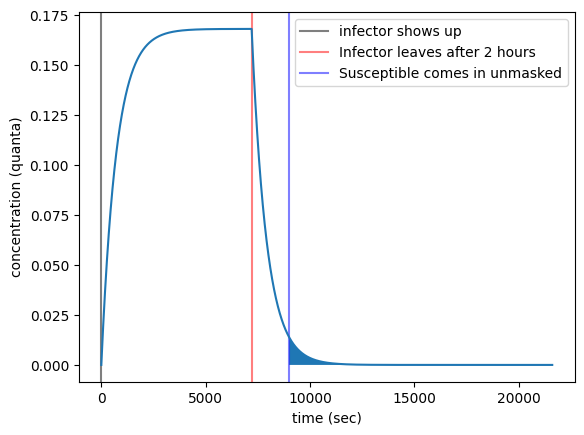

In [58]:
fig, ax = plt.subplots()

ax.axvline(0, color='black', alpha=0.5)
#ax.axvline(3600, color='g')
ax.axvline(7200, color='r', alpha=0.5)
ax.axvline(7200 + 3600 / 2, color='b', alpha=0.5)
ax.legend(["infector shows up", "Infector leaves after 2 hours", "Susceptible comes in unmasked"])
quanta_curve[0].plot(xlabel='time (sec)', ylabel='concentration (quanta)')
ax.fill_between(np.arange(7200 + 3600 / 2, quanta_curve[0].shape[0]), 0, quanta_curve[0][int(7200 + 3600 / 2):])